In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from thesis_toolbox.plot.tools import add_letter
import numpy as np
from thesis_toolbox.composites.create_composites import detrend_timeseries,select_years_to_composite
from thesis_toolbox.composites.setup_thesis_data import geopot_wind_composite
from thesis_toolbox.plot.plot_composites import plot_500hPa_composite, plot_which_years_composited
from thesis_toolbox.utils import get_locations_CLP,read_receptor_composite
import glob
import matplotlib as mpl
%matplotlib inline

In [2]:
if 'snakemake' in globals():
    to_file = True
    path='./'
    psize = snakemake.wildcards.psize
else:
    path = '../../../'
    to_file= False
    psize='20micron'

In [14]:
def plot_composite(composite,axes, locs, scale=0.5, u=2, add_label=False):
    for ax ,loc_name in zip(axes,locs.index):
        ax.tick_params(axis="y", which='both',right=True, left=True, labelleft=False, labelright=False)
        ax.tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=False)
        plot_500hPa_composite(composite, ax=ax,  x_qk=0.87, y_qk=1.1, receptor_loc=locs.loc[loc_name,:].to_list(), 
                               receptor_name=loc_name
                          , vector_scale=scale,angles='uv', colorbar=False, hatches='xxx', hatch_color='dimgrey',
                                  xticks=[20,60,100,140,180],receptor_color=locs.loc[loc_name,'color'])
        if add_label:
            if loc_name=='BADOE':
                loc_name='BAODE'
            ax.set_ylabel(loc_name)


In [4]:
locs_df = get_locations_CLP()
locs_df = locs_df.drop(['BADOE', 'ULANTATAL', 'YINCHUAN'])
locs_df = locs_df.reindex(['SHAPOTOU', 'SACOL','BAODE','LUOCHUAN', 'LINGTAI', 'LANTIAN'])
locs =['SHAPOTOU','SACOL','BAODE','LUOCHUAN','LINGTAI','LANTIAN']

data_path =path + 'downloads/intermediate_results/'

DJF_wetdep_composite = read_receptor_composite(locs, 
                                             path, 'windspeed_geopot_500hPa', psize,'DJF', std='4_rank',
                                               kind='total_deposition')
MAM_wetdep_composite = read_receptor_composite(locs, path, 'windspeed_geopot_500hPa', psize,'MAM', std='4_rank',
                                               kind='total_deposition')

DJF_drydep_composite = read_receptor_composite(locs, path, 'windspeed_geopot_500hPa', 
                                               psize,'DJF', std='4_rank', kind='drydep')

MAM_drydep_composite = read_receptor_composite(locs, path, 'windspeed_geopot_500hPa', 
                                               psize,'MAM', std='4_rank', kind='drydep')


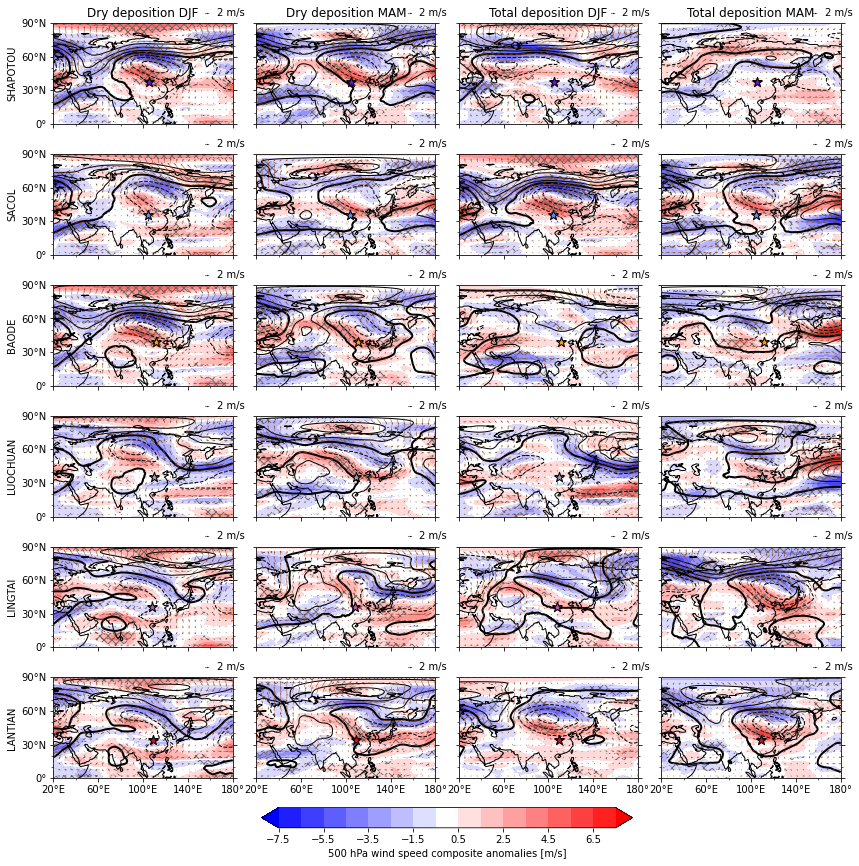

In [15]:
fig,ax = plt.subplots(nrows=6, ncols=4,  figsize=(8.3*1.7, 11.7*1.2), subplot_kw={'projection':ccrs.PlateCarree()})


plot_composite(DJF_drydep_composite, ax[:,0], locs_df, add_label=True)
plot_composite(MAM_drydep_composite,ax[:,1], locs_df)
plot_composite(DJF_wetdep_composite,ax[:,2], locs_df)
plot_composite(MAM_wetdep_composite,ax[:,-1], locs_df)
for axi,l in zip(ax[:,0].ravel(),locs_df.index):
    axi.tick_params(axis="y", which='both',right=True, left=True, labelleft=True, labelright=False)    

for axi in ax[-1,:].ravel():

    axi.tick_params(axis="x", which='both',bottom=True, top=False, labelbottom=True)
ax[0,0].set_title('Dry deposition DJF')
ax[0,1].set_title('Dry deposition MAM')
ax[0,2].set_title('Total deposition DJF')
ax[0,3].set_title('Total deposition MAM')
fig.subplots_adjust(hspace=0.2, wspace=0.13)
cax = fig.add_axes([0.33,0.08,0.365, 0.02])
cmap = mpl.cm.bwr
# add_letter(ax.T, y=1.1, fontsize=10)
fig.colorbar(mpl.cm.ScalarMappable(mpl.colors.BoundaryNorm(np.linspace(-7.5,7.5,16),cmap.N, extend='both'), 
                                          cmap=cmap),cax=cax, extend='both', orientation='horizontal', 
            label='500 hPa wind speed composite anomalies [m/s]')

if to_file:
    plt.savefig(snakemake.output.composite_facet_plot, bbox_inches='tight', dpi=300)